In [1]:
import numpy as np 
import pandas as pd 
import os
from glob import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import fnmatch
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
import os
from tensorflow.keras import layers 
from tensorflow.keras import Model

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.rcParams['figure.figsize'] = (12,7)

In [2]:
print(os.listdir("cell_images"))

['Parasitized', 'Uninfected']


In [3]:
# Setting paths and showing the number of images
infected = os.listdir("cell_images/Parasitized")
infected_path = "cell_images/Parasitized"
print("Length of infected data = ", len(infected), 'images')
uninfected = os.listdir("cell_images/Uninfected")
uninfected_path = "cell_images/Uninfected"
print("Length of uninfected data = ", len(uninfected), 'images')

Length of infected data =  13780 images
Length of uninfected data =  13780 images


In [4]:
img_shape = (64, 64, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [5]:
train = image_gen.flow_from_directory('cell_images',
                                     target_size = img_shape[:2],
                                     color_mode = 'rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'training',
                                     shuffle = True)

validation = image_gen.flow_from_directory('cell_images',
                                     target_size = img_shape[:2],
                                     color_mode ='rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'validation',
                                     shuffle = False)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [7]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(2,2),padding='valid',activation='relu',input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(2,2),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=(2,2),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(3,3),strides=(2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(265,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

    ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [8]:
callback = EarlyStopping(restore_best_weights=True, patience=2)

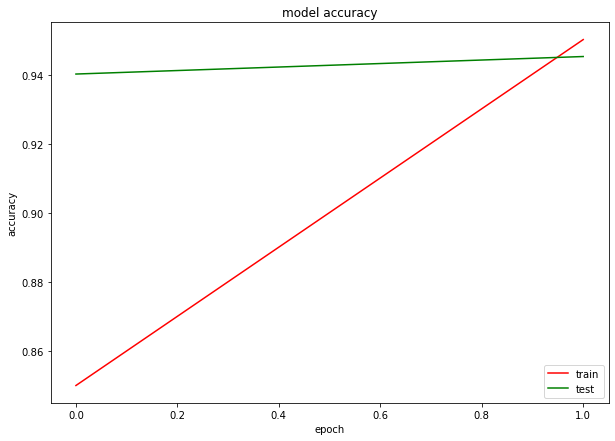

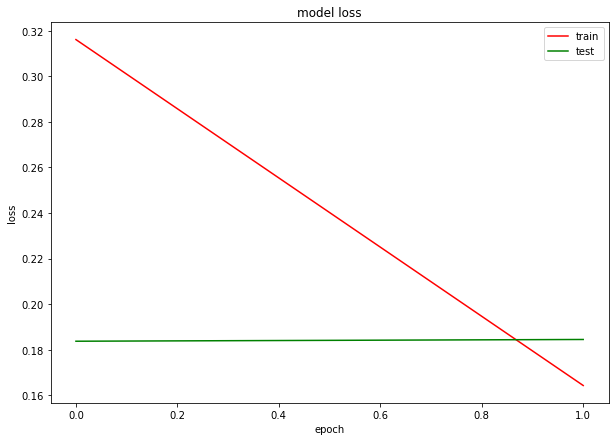

In [16]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history.history['accuracy'], color='red')
ax.plot(history.history['val_accuracy'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history.history['loss'], color='red')
ax.plot(history.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [10]:
loaded_model = tf.keras.models.load_model('Maleriya_images_model.h5')

In [11]:
loaded_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
pred = loaded_model.predict(train[0][0])

In [22]:
pred[0]

array([0.96898717, 0.03101285], dtype=float32)

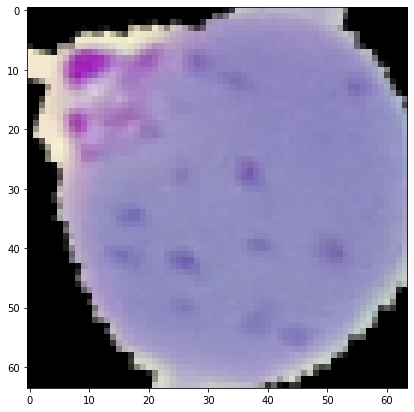

In [18]:
plt.imshow(train[0][0][0])
plt.show()

# Hence the Prediction is Correct - Parasitized